# P1 - Time Series Analysis

Due date: July 18, 2021, 11:59 pm

- The result will be evaluated from a report in Jupyter, which must be found in a public GitHub repository.
- The project must be carried out in the groups assigned in class.
- Use clear and rigorous procedures.
- Due date: July 18, 2021, 11:59 pm, through Bloque Neón + (Upload repository link)
- Projects will not be received after the delivery time or by any other means than the one established.

The project seeks to analyze a question of interest, which can be framed within a context, in order to interpret the results

1. Choosing your time series (Friday July 11th).

For the project, each group must select a dataset of their choice where the analysis can be performed using a time series model. There are many sources of time series data on the Internet. Government agencies are some of the best sources. But be resourceful. It is better to find a data set is from a process that interests you. Use a recent time-series, also try to avoid a tipical stock-price / exchange rates series. The selected time series must be sent no later than Sunday, July 11, 11:59 pm, through Sicua +, for approval.

The analysis of the data must consider:

2. Analysis of the context of the problem and relevance of the analysis: This should answer the question of why it is interesting or important to study the selected data.

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

5. Conclusions: The conclusions must be relevant to the problem of interest. Conclusions on the procedures performed are also expected.

In [3]:
import pandas as pd
import holidays_co
import matplotlib.pyplot as plt

In [122]:
!pip install pmdarima

  Using cached pmdarima-1.8.2-cp38-cp38-win_amd64.whl (596 kB)


In [244]:
df = pd.read_csv('../datasets/dataset_proyecto1.zip')

In [245]:
df.head()
df.columns

Index(['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand',
       'lastPrice', 'Price', 'stock', 'available_stock', 'city',
       'CAT_ACCESORIOS', 'CAT_EXPOPET', 'CAT_SNACKS', 'CAT_MEDICINAS',
       'CAT_CUIDADO_E_HIGIENE', 'CAT_JUGUETES', 'CAT_ALIMENTO_PRESCRIPCION',
       'CAT_HIGIENE', 'CAT_REGALOS', 'CAT_PARA_PETLOVERS', 'CAT_FARMAPET',
       'CAT_PREMIOS', 'CAT_VETERINARIOS', 'CAT_ALIMENTO', 'CAT_COMBOS',
       'CAT_ARENAS'],
      dtype='object')

In [246]:
df['ALIMENTOS'] = (df.CAT_SNACKS + df.CAT_ALIMENTO_PRESCRIPCION + df.CAT_ALIMENTO) >= 1
df['ALIMENTOS'] = df.ALIMENTOS.astype('int')
df.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,...,CAT_HIGIENE,CAT_REGALOS,CAT_PARA_PETLOVERS,CAT_FARMAPET,CAT_PREMIOS,CAT_VETERINARIOS,CAT_ALIMENTO,CAT_COMBOS,CAT_ARENAS,ALIMENTOS
0,2020-08-17T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
1,2020-08-18T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
2,2020-08-19T00:00:00.000Z,1,9953,2,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
3,2020-08-20T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0
4,2020-08-21T00:00:00.000Z,1,9953,0,0,11560.0,11560.0,3.0,1.0,Bogota,...,0,0,0,1,0,0,0,0,0,0


In [247]:
df = df[['date', 'warehouse_id_ref', 'itemid', 'demand', 'pending_demand', 
         'lastPrice', 'Price', 'stock', 'available_stock', 'city', 'ALIMENTOS']]

In [248]:
df_alimentos = df[df.ALIMENTOS == 1]
df_no_alimentos = df[df.ALIMENTOS == 0]
print( df.shape ) 
print( df_alimentos.shape ) 
print( df_no_alimentos.shape ) 

(2286885, 11)
(1423388, 11)
(863497, 11)


In [251]:
df_alimentos = df_alimentos[df_alimentos['date'] >= '2020-09-01']
df_no_alimentos = df_no_alimentos[df_no_alimentos['date'] >= '2020-09-01']

In [252]:
df_alimentos.head()

,date,warehouse_id_ref,itemid,demand,pending_demand,lastPrice,Price,stock,available_stock,city,ALIMENTOS
345,2020-09-01T00:00:00.000Z,1,10642,4,0,3299.0,3299.0,154.0,1.0,Bogota,1
346,2020-09-02T00:00:00.000Z,1,10642,15,0,3299.0,3299.0,154.0,1.0,Bogota,1
347,2020-09-03T00:00:00.000Z,1,10642,7,0,3299.0,3299.0,154.0,1.0,Bogota,1
348,2020-09-04T00:00:00.000Z,1,10642,2,0,3299.0,3299.0,154.0,1.0,Bogota,1
349,2020-09-05T00:00:00.000Z,1,10642,8,0,3299.0,3299.0,226.0,1.0,Bogota,1


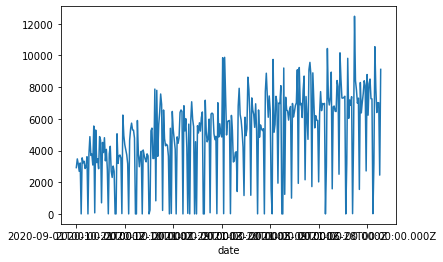

In [253]:
df_alimentos.groupby('date')['demand'].sum().plot()

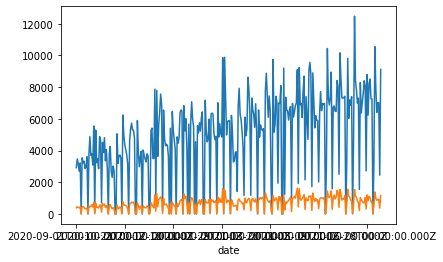

In [254]:
df_alimentos.groupby('date')['demand'].sum().plot()
df_no_alimentos.groupby('date')['demand'].sum().plot()

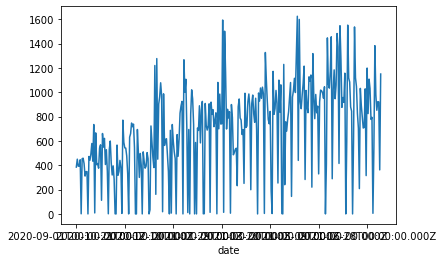

In [255]:
df_no_alimentos.groupby('date')['demand'].sum().plot()

In [256]:
df_alimentos.date = pd.to_datetime(df_alimentos.date)
df_alimentos = df_alimentos.dropna()

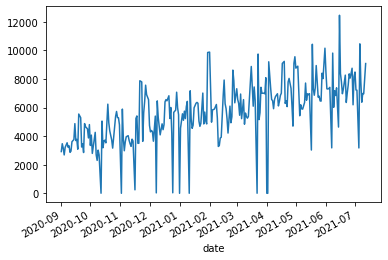

In [257]:
df_alimentos_sin_fds = df_alimentos[ ~df_alimentos.date.dt.weekday.isin([6]) ]
df_alimentos_sin_fds.groupby('date')['demand'].sum().plot()

In [258]:
df_alimentos_sin_fds.date.dt.weekday.value_counts()

0    194622
5    194010
4    193407
3    192820
2    192286
1    191694
Name: date, dtype: int64

In [259]:
pd.date_range(start = df_alimentos.date.min(), 
              end = df_alimentos.date.max() ).difference(df_alimentos.date)

DatetimeIndex([], dtype='datetime64[ns, UTC]', freq=None)

In [260]:
festivos = [ x[0] for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]

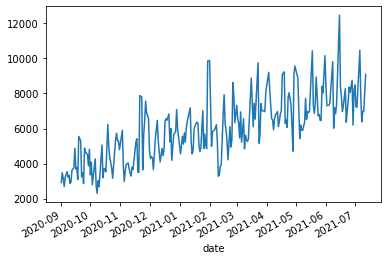

In [261]:
df_alimentos_sin_fds_ni_festivos = df_alimentos_sin_fds[ ~df_alimentos_sin_fds.date.isin( festivos ) ]
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

In [262]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [263]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

Results of Dickey-Fuller Test:
Test Statistic                  -2.804948
p-value                          0.057570
#Lags Used                       4.000000
Number of Observations Used    250.000000
Critical Value (1%)             -3.456781
Critical Value (5%)             -2.873172
Critical Value (10%)            -2.572969
dtype: float64


E:\Users\juanb\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


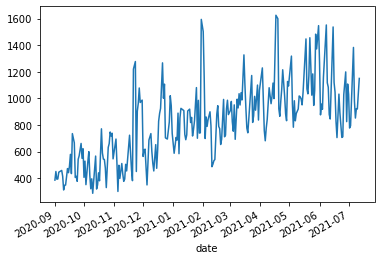

In [264]:
df_no_alimentos.date = pd.to_datetime(df_no_alimentos.date)
df_no_alimentos_sin_fds = df_no_alimentos[ ~df_no_alimentos.date.dt.weekday.isin([6]) ]
df_no_alimentos_sin_fds_ni_festivos = df_no_alimentos_sin_fds[ ~df_no_alimentos_sin_fds.date.isin( festivos ) ]
df_no_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().plot()

3. Understanding the data: Understand and analyze the main components of the time series, for example: seasonality, cyclicity, autocorrelation, behavior of the residuals, among others. Make use of graphs that allow you to understand each of the components clearly.

4. Application of the models in predictions: Correct use of the models seen in class to make predictions related to the problem of interest.

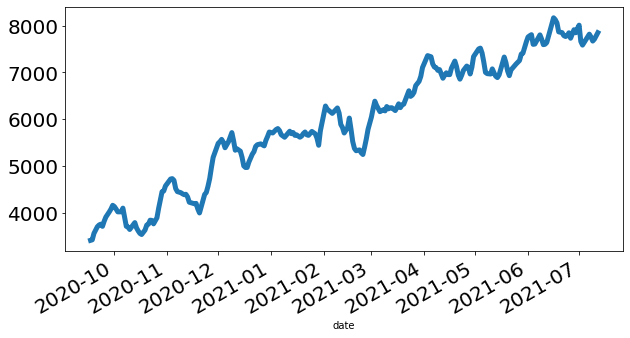

In [265]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().rolling(15).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)

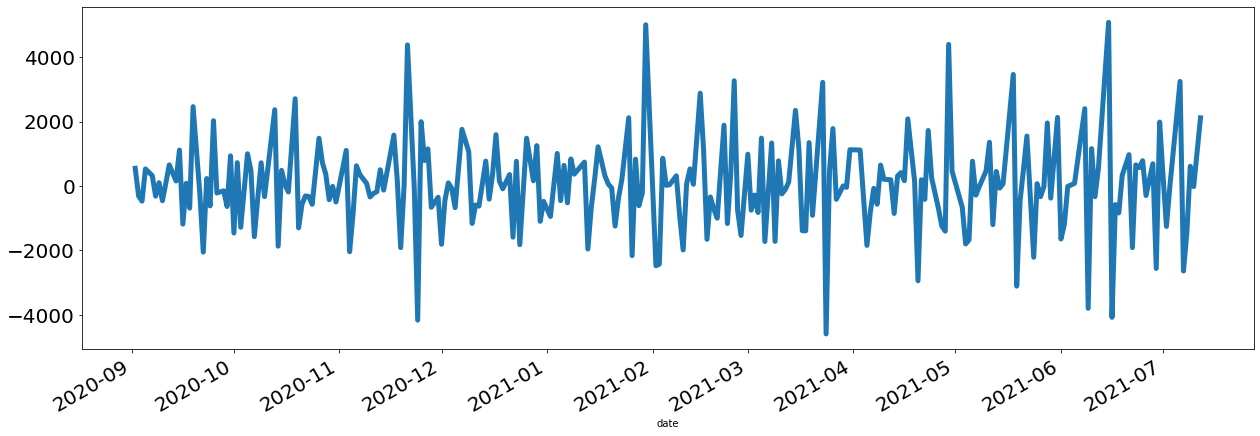

In [266]:
df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff().plot(figsize=(21,7), linewidth=5, fontsize=20)

In [267]:
adf_test(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum().diff()[1:])

Results of Dickey-Fuller Test:
Test Statistic                -7.879491e+00
p-value                        4.744798e-12
#Lags Used                     1.100000e+01
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


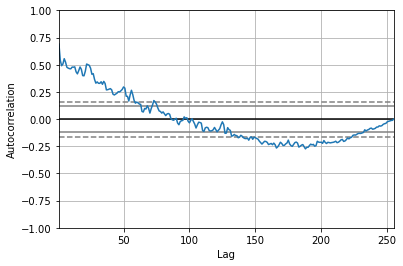

In [268]:
pd.plotting.autocorrelation_plot(df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum())

In [269]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

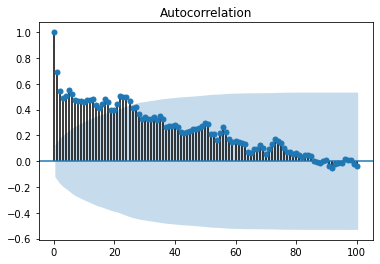

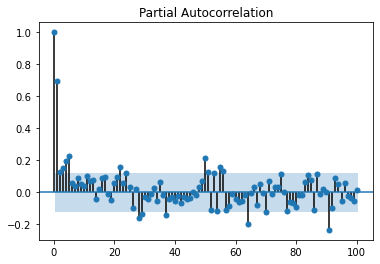

In [270]:
plot_acf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);
plot_pacf( df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum(), lags=100);

In [271]:
from statsmodels.tsa.arima_model import ARIMA

series = df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum()

# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                             ARIMA Model Results                              
Dep. Variable:               D.demand   No. Observations:                  254
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2164.980
Method:                       css-mle   S.D. of innovations           1215.696
Date:                Sun, 18 Jul 2021   AIC                           4343.959
Time:                        20:11:52   BIC                           4368.721
Sample:                             1   HQIC                          4353.920
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.1201     27.513      0.695      0.487     -34.803      73.044
ar.L1.D.demand    -0.4846      0.062     -7.761      0.000      -0.607      -0.362
ar.L2.D.demand    -0.4621      0.066

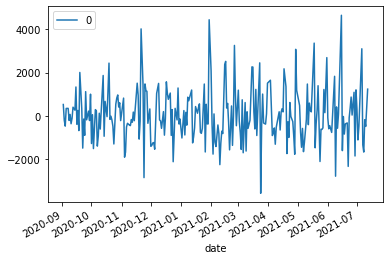

In [272]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

        predict   real
0   6929.727047   6361
1   7461.390891   7718
2   7886.588600   6517
3   7609.223746   6967
4   7622.633919   6901
5   7775.728660   6973
6   7506.083813  10435
7   7668.697105   7326
8   7718.931393   6866
9   7515.447559   7394
10  7737.302055   8944
11  7677.930941   6731
12  7572.446085   6802
13  7791.721379   6470
14  7657.724633   6452
15  7658.859307   8409
16  7826.990946   8031
17  7665.228729  10159
18  7756.131620   8512
19  7846.095615   7314
20  7702.296679   7301
21  7849.000784   7333
22  7857.431261   7417
23  7765.446944   9816
24  7927.567383   6019
25  7871.048034   7179
26  7846.918897   6846
27  7988.031073   7385
28  7895.506618  12464
29  7936.813402   8387
30  8032.106109   7808
31  7935.837757   6971
32  8025.507768   7300
33  8065.398209   8272
34  7992.808495   6358
35  8105.673706   7012
36  8095.255465   7579
37  8063.386357   8363
38  8173.462376   8066
39  8128.655094   8756
40  8142.050184   6196
41  8228.706944   8180
42  8170.59

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


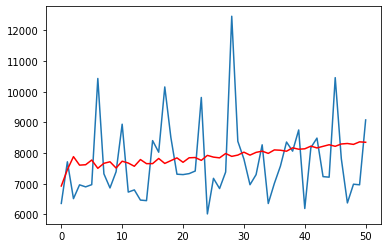

In [278]:
X = series.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
future = [x for x in test]

model = ARIMA(history, order=(5,1,5))
model_fit = model.fit(disp=0)
output = model_fit.forecast(steps=len(test))[0]
yhat = output
predictions = yhat
real_values = future

print(pd.DataFrame({'predict':predictions, 'real':real_values}))

from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [279]:
from sklearn.metrics import mean_absolute_error

In [280]:
mean_absolute_error(test, predictions)

985.6119324073346

In [276]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#Iterando
results = []
for p in range(1,9):        
    for d in range(0,4):                
        for q in range(1,6):
            
            try:                
                # Create and fit ARMA(p,q) model
                X = series.values
                size = int(len(X) * 0.66)
                train, test = X[0:size], X[size:len(X)]
                history = [x for x in train]
                future = [x for x in test]

                model = ARIMA(history, order=(p,d,q))
                model_fit = model.fit(disp=0)
                output = model_fit.forecast(steps=len(test))[0]
                yhat = output
                predictions = yhat
                real_values = future
                error = mean_squared_error(test, predictions)

                # Print p, q, AIC, BIC
                #print(p, d, q, 'Test MSE: %.3f' % error) 
                results.append([p,d,q,error])
                
            except:
                #print(p, d, q, None )
                results.append([p,d,q,None])
                
df = pd.DataFrame(results,columns=['p','d','q','mse'])

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:218: RuntimeWarning: divide by zero encountered in true_divide
  loglike, sigma2 = kalman_loglike.kalman_loglike_double(
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmo

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:6

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountere

E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
E:\Users\juanb\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
E:\Users\juanb\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting he

In [277]:
df.loc[df['mse'] == df['mse'].min()]

,p,d,q,mse
89,5,1,5,1.411141e+06


In [281]:
from pmdarima.arima import auto_arima

In [282]:
model = auto_arima(history, X=None, start_p=1, d=None, start_q=1, max_p=9, max_d=1, max_q=9)
model_fit = model.fit(history)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  204
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1715.127
Date:                Sun, 18 Jul 2021   AIC                           3438.254
Time:                        20:14:41   BIC                           3451.506
Sample:                             0   HQIC                          3443.615
                                - 204                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4589      0.076      6.057      0.000       0.310       0.607
ar.L2         -0.1547      0.079     -1.956      0.050      -0.310       0.000
ma.L1         -0.9198      0.042    -21.893      0.000      -1.002      -0.837
sigma2      1.264e+06   9.79e+04     12.908      0.000    1.07e+06    1.46e+06
===================================================================================
Ljung-Box (Q):                       33.35   Jarque-Bera (JB):                33.31
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               1.49   Skew:                             0.67
Prob(H) (two-sided):                  0.10   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

        predict   real
0   6596.375482   6361
1   6922.252227   7718
2   6962.985958   6517
3   6931.265453   6967
4   6910.407200   6901
5   6905.742428   6973
6   6906.828531  10435
7   6908.048594   7326
8   6908.440466   6866
9   6908.431553   7394
10  6908.366840   8944
11  6908.338522   6731
12  6908.335537   6802
13  6908.338549   6470
14  6908.340392   6452
15  6908.340773   8409
16  6908.340662   8031
17  6908.340552  10159
18  6908.340519   8512
19  6908.340521   7314
20  6908.340527   7301
21  6908.340529   7333
22  6908.340529   7417
23  6908.340529   9816
24  6908.340529   6019
25  6908.340529   7179
26  6908.340529   6846
27  6908.340529   7385
28  6908.340529  12464
29  6908.340529   8387
30  6908.340529   7808
31  6908.340529   6971
32  6908.340529   7300
33  6908.340529   8272
34  6908.340529   6358
35  6908.340529   7012
36  6908.340529   7579
37  6908.340529   8363
38  6908.340529   8066
39  6908.340529   8756
40  6908.340529   6196
41  6908.340529   8180
42  6908.34

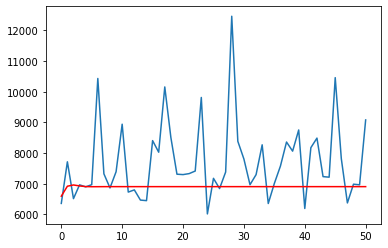

In [283]:
output = model_fit.predict(len(test))
yhat = output
predictions = yhat
real_values = future

print(pd.DataFrame({'predict':predictions, 'real':real_values}))

from sklearn.metrics import mean_squared_error
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [284]:
mean_absolute_error(test, predictions)

983.2308303799698

In [285]:
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet
import pandas as pd
import numpy as np
%matplotlib inline

In [286]:
series = df_alimentos_sin_fds_ni_festivos.groupby('date')['demand'].sum()
df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


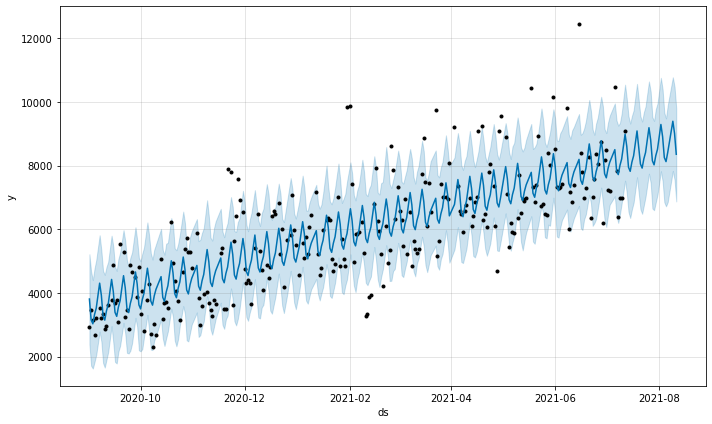

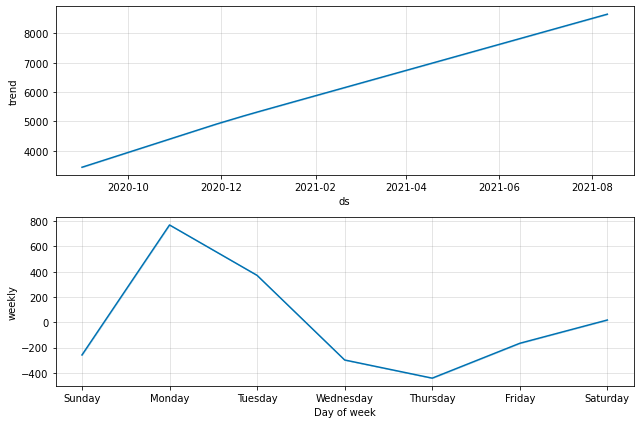

In [287]:
m = Prophet()
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')
future = future[ ~future.ds.dt.weekday.isin([6]) ]
future = future[ ~future.ds.isin( festivos ) ]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [288]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
df_cv = cross_validation(m, initial='60 days', period='6 days', horizon = '120 days')

INFO:prophet:Making 23 forecasts with cutoffs between 2020-11-02 00:00:00 and 2021-03-14 00:00:00


In [289]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,12 days,1.713360e+06,1308.953849,1035.121855,0.195218,0.166091,0.184288,0.676233
1,13 days,1.738610e+06,1318.563725,1039.216897,0.195482,0.166091,0.184547,0.671702
2,14 days,1.746022e+06,1321.371071,1035.635784,0.193916,0.163506,0.183324,0.670179
3,15 days,1.739144e+06,1318.766157,1029.316842,0.189777,0.160784,0.180239,0.683266
4,16 days,1.744420e+06,1320.764955,1028.774015,0.189122,0.156232,0.179357,0.682558
...,...,...,...,...,...,...,...,...
104,116 days,1.907763e+06,1381.218084,1137.177876,0.169325,0.148302,0.155342,0.571881
105,117 days,1.920945e+06,1385.981479,1136.550510,0.169197,0.145043,0.154822,0.578475
106,118 days,1.921551e+06,1386.200355,1143.231336,0.170003,0.142223,0.155614,0.586028
107,119 days,1.906842e+06,1380.884472,1138.479154,0.168529,0.142223,0.154575,0.583857


In [290]:
df_p["mae"].mean()

1085.1892141924584

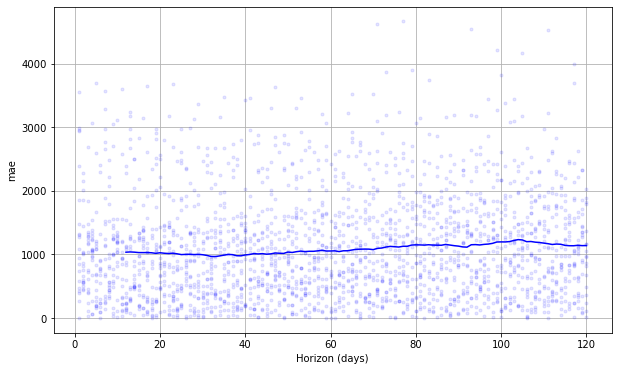

In [291]:
fig = plot_cross_validation_metric(df_cv, metric='mae')

In [292]:
festivos_col = [ (x[0],x[1]) for x in (holidays_co.get_colombia_holidays_by_year(2020) + holidays_co.get_colombia_holidays_by_year(2021)) ]
df_festivos_col = pd.DataFrame( festivos_col, columns=['ds','holiday'])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


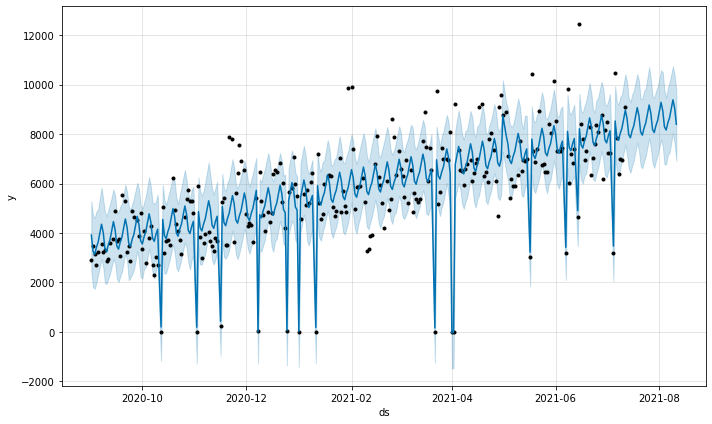

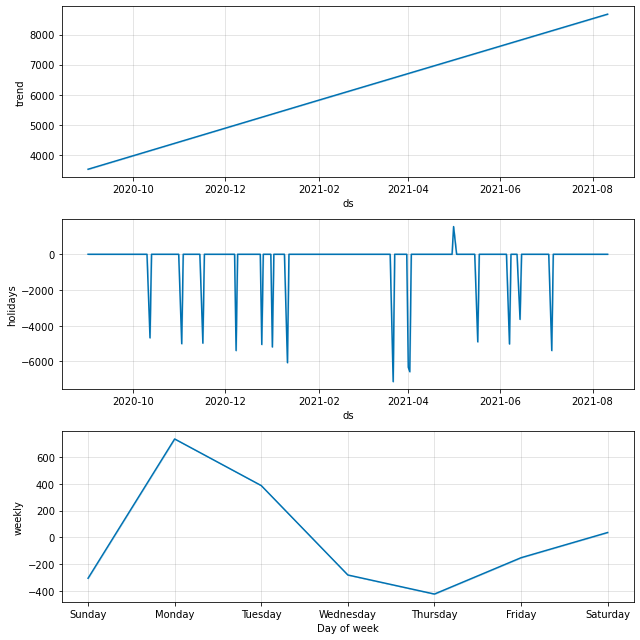

In [293]:
series = df_alimentos_sin_fds.groupby('date')['demand'].sum()

df_prophet = pd.DataFrame( series ).reset_index().rename(columns={'date':'ds','demand':'y'})
df_prophet.ds = df_prophet.ds.dt.date

m = Prophet(holidays = df_festivos_col)
m.fit(df_prophet)

future = m.make_future_dataframe(periods=30, freq='D')
future = future[~future.ds.dt.weekday.isin([6])]

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


fig1 = m.plot(forecast)
m.plot_components(forecast);

In [294]:
df_cv = cross_validation(m, initial='60 days', period='6 days', horizon = '120 days')

INFO:prophet:Making 23 forecasts with cutoffs between 2020-11-02 00:00:00 and 2021-03-14 00:00:00


In [295]:
df_p = performance_metrics(df_cv)
df_p

INFO:prophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,smape,coverage
0,12 days,3.219925e+06,1794.414924,1256.446265,0.172228,0.267045,0.652542
1,13 days,3.222573e+06,1795.152621,1255.371553,0.172228,0.266302,0.649576
2,14 days,3.491902e+06,1868.663280,1281.809052,0.168569,0.273153,0.648305
3,15 days,3.485736e+06,1867.012647,1275.659521,0.167430,0.270285,0.652542
4,16 days,3.508036e+06,1872.975259,1276.248073,0.166457,0.269334,0.648305
...,...,...,...,...,...,...,...
104,116 days,4.032860e+06,2008.198114,1397.960864,0.153423,0.219747,0.548617
105,117 days,4.051397e+06,2012.808265,1402.022217,0.151498,0.219727,0.549576
106,118 days,4.067196e+06,2016.729021,1408.972515,0.151498,0.220652,0.553390
107,119 days,4.199295e+06,2049.218024,1425.660671,0.149218,0.223210,0.550847


In [296]:
df_p["mae"].mean()

1339.0160920326355

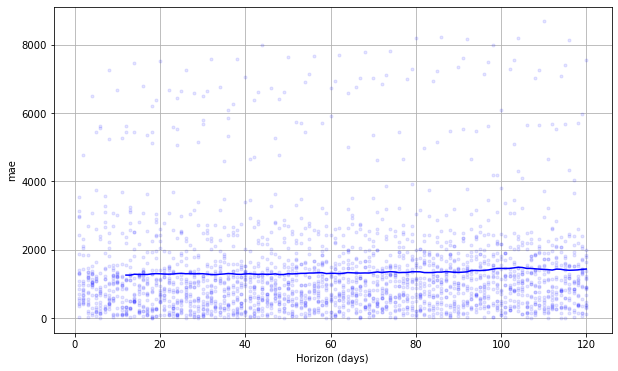

In [297]:
fig = plot_cross_validation_metric(df_cv, metric='mae')